In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression import gmm

In [18]:
#pip install linearmodels

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
from linearmodels.datasets import wage
data = wage.load()
dependent = np.log(data.wage)
exog = sm.add_constant(data.exper)
endog = data.educ
instruments = data.sibs

mod = IV2SLS(dependent, exog, endog, instruments)
res = mod.fit(cov_type='unadjusted')
res

C:\Users\Z4174\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                   wage   R-squared:                      0.0459
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0438
No. Observations:                 934   F-statistic:                    23.872
Date:                Wed, Sep 09 2020   P-value (F-stat)                0.0000
Time:                        14:40:04   Distribution:                  chi2(2)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          4.4912     0.4692     9.5719     0.0000      3.5716      5.4108
exper          0.0341     0.0073     4.6649     0.0000      0.0198      0.0485
educ           0.1405     0.0290     4.8434     0.0000      0.0837      0.1974
==============================================================================

Endogenous: educ
Instruments: sibs
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x23fe2f39608

In [20]:
from linearmodels.datasets import mroz
print(mroz.DESCR)
data = mroz.load()
data = data.dropna()


T.A. Mroz (1987), "The Sensitivity of an Empirical Model of Married Women's
Hours of Work to Economic and Statistical Assumptions," Econometrica 55,
765-799.

nlf        1 if in labor force, 1975
hours      hours worked, 1975
kidslt6    # kids < 6 years
kidsge6    # kids 6-18
age        woman's age in yrs
educ       years of schooling
wage       estimated wage from earns., hours
repwage    reported wage at interview in 1976
hushrs     hours worked by husband, 1975
husage     husband's age
huseduc    husband's years of schooling
huswage    husband's hourly wage, 1975
faminc     family income, 1975
mtr        fed. marginal tax rate facing woman
motheduc   mother's years of schooling
fatheduc   father's years of schooling
unem       unem. rate in county of resid.
city       =1 if live in SMSA
exper      actual labor mkt exper
nwifeinc   (faminc - wage*hours)/1000
lwage      log(wage)
expersq    exper^2



In [21]:
data

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,680,0,5,36,10,2.3118,0.00,3430,43,...,19772,0.7215,7,7,7.5,0,2,18.199980,0.838026,4
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,...,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441
425,1,2144,0,2,43,13,5.8675,0.00,2140,43,...,34220,0.5815,7,7,7.5,1,22,21.640080,1.769429,484
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,...,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196


In [30]:
# OLS
dependent = np.log(data.wage)
exog = sm.add_constant(data.educ)
endog = None
instruments = None

mod = IV2SLS(dependent, exog, endog, instruments)
res = mod.fit(cov_type='unadjusted')
res

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                   wage   R-squared:                      0.1179
Estimator:                        OLS   Adj. R-squared:                 0.1158
No. Observations:                 428   F-statistic:                    57.196
Date:                Wed, Sep 09 2020   P-value (F-stat)                0.0000
Time:                        14:41:20   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const         -0.1852     0.1848    -1.0022     0.3163     -0.5474      0.1770
educ           0.1086     0.0144     7.5628     0.0000      0.0805      0.1368
==============================================================================
OLSResults, id: 0x23fe342e7c8

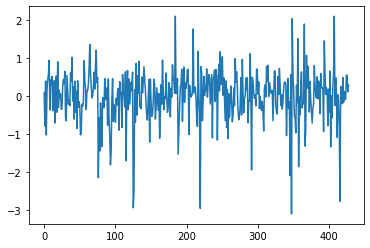

In [31]:
plt.plot(res.resids)

In [37]:
# IVSLS with the help of 'fatheduc'
dependent = np.log(data.wage)
exog = sm.add_constant(data.educ)["const"]
endog = data.educ
instruments = data.fatheduc

mod = IV2SLS(dependent, exog, endog, instruments)
res_IV_fatheduc = mod.fit(cov_type='unadjusted')
res_IV_fatheduc

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                   wage   R-squared:                      0.0934
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0913
No. Observations:                 428   F-statistic:                    2.8487
Date:                Wed, Sep 09 2020   P-value (F-stat)                0.0914
Time:                        14:42:16   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.4411     0.4451     0.9911     0.3216     -0.4312      1.3134
educ           0.0592     0.0351     1.6878     0.0914     -0.0095      0.1279
==============================================================================

Endogenous: educ
Instruments: fatheduc
Unadjusted Covariance (Homoskedastic)
Debiased: False
IVResults, id: 0x23fe44c0308

In [39]:
from linearmodels import IV2SLS, IVLIML, IVGMM, IVGMMCUE

In [50]:
# GMM with the help of 'fatheduc'
dependent = np.log(data.wage)
exog = sm.add_constant(data.educ)["const"]
endog = data.educ
instruments = data.fatheduc

mod = IVGMM(dependent, exog, endog, instruments)
res_GMM_fatheduc = mod.fit(cov_type='robust')
res_GMM_fatheduc

IV-GMM Estimation Summary                           
==============================================================================
Dep. Variable:                   wage   R-squared:                      0.0934
Estimator:                     IV-GMM   Adj. R-squared:                 0.0913
No. Observations:                 428   F-statistic:                    2.5656
Date:                Wed, Sep 09 2020   P-value (F-stat)                0.1092
Time:                        14:56:46   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.4411     0.4643     0.9501     0.3421     -0.4689      1.3511
educ           0.0592     0.0369     1.6017     0.1092     -0.0132      0.1316
==============================================================================

Endogenous: educ
Instruments: fatheduc
GMM Covariance
Debiased: False
Robust (Heteroskedastic)
IVGMMResults, id: 0x23fe49fc508

In [47]:
from linearmodels.iv import compare
compare({"OLS":res , "IV":res_IV_fatheduc, "GMM":res_GMM_fatheduc})

,OLS,IV,GMM
Dep. Variable,wage,wage,wage
Estimator,OLS,IV-GMM,IV-GMM
No. Observations,428,428,428
Cov. Est.,unadjusted,unadjusted,robust
R-squared,0.1179,0.0934,0.0934
Adj. R-squared,0.1158,0.0913,0.0913
F-statistic,57.196,2.8487,2.5656
P-value (F-stat),3.941e-14,0.0914,0.1092
==================,============,============,==========
const,-0.1852,0.4411,0.4411


In [25]:
# example 2 consider the men's wage
from linearmodels.datasets import wage
men = wage.load()
print(wage.DESCR)
men = men[['educ','wage','sibs','exper']]
men = sm.add_constant(men)
men = men.dropna()


M. Blackburn and D. Neumark (1992), "Unobserved Ability, Efficiency Wages, and
Interindustry Wage Differentials," Quarterly Journal of Economics 107, 1421-1436.

wage                     monthly earnings
hours                    average weekly hours
IQ                       IQ score
KWW                      knowledge of world work score
educ                     years of education
exper                    years of work experience
tenure                   years with current employer
age                      age in years
married                  =1 if married
black                    =1 if black
south                    =1 if live in south
urban                    =1 if live in SMSA
sibs                     number of siblings
brthord                  birth order
meduc                    mother's education
feduc                    father's education
lwage                    natural log of wage



In [26]:
res_men_ols = IV2SLS(np.log(men.wage), men[['const', 'educ']], None, None).fit(cov_type='unadjusted')
print(res_men_ols)

                            OLS Estimation Summary                            
Dep. Variable:                   wage   R-squared:                      0.0973
Estimator:                        OLS   Adj. R-squared:                 0.0964
No. Observations:                 934   F-statistic:                    100.71
Date:                Tue, Sep 08 2020   P-value (F-stat)                0.0000
Time:                        17:25:15   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          5.9733     0.0814     73.419     0.0000      5.8139      6.1328
educ           0.0598     0.0060     10.035     0.00

In [27]:
res_men_IV = IV2SLS(np.log(men.wage), men.const, men.educ, men.sibs).fit(cov_type='unadjusted')
print(res_men_IV.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                   wage   R-squared:                     -0.0090
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0101
No. Observations:                 934   F-statistic:                    21.715
Date:                Tue, Sep 08 2020   P-value (F-stat)                0.0000
Time:                        17:25:46   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          5.1310     0.3539     14.497     0.0000      4.4373      5.8248
educ           0.1224     0.0263     4.6599     0.00

In [31]:
res2 = res_men_IV.resids ** 2
fgls_mod = IV2SLS(np.log(res2), men[['const','sibs','exper']], None, None)
fgls_res = fgls_mod.fit()
sigma2_hat = np.exp(np.log(res2) - np.log(fgls_res.resids))
print(fgls_res)

                            OLS Estimation Summary                            
Dep. Variable:               residual   R-squared:                      0.0045
Estimator:                        OLS   Adj. R-squared:                 0.0024
No. Observations:                 934   F-statistic:                    3.9903
Date:                Tue, Sep 08 2020   P-value (F-stat)                0.1360
Time:                        17:49:10   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const         -2.9315     0.2224    -13.179     0.0000     -3.3675     -2.4956
sibs          -0.0651     0.0335    -1.9452     0.05

In [33]:
#GLS result
res_gls = IV2SLS(np.log(men.wage), men.const, men.educ, men.sibs, weights=1 / sigma2_hat).fit(cov_type='unadjusted')
print(res_gls)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                   wage   R-squared:                     -0.0779
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0799
No. Observations:                 553   F-statistic:                    7.4285
Date:                Tue, Sep 08 2020   P-value (F-stat)                0.0064
Time:                        17:49:17   Distribution:                  chi2(1)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          5.4416     0.4850     11.220     0.0000      4.4911      6.3922
educ           0.0997     0.0366     2.7255     0.00